In [102]:
import dtree
import monkdata as m
from drawtree_qt5 import drawTree 

import numpy as np
import matplotlib.pyplot as plt
import random

# MONK datasets

- 3 datasets:
1. MONK1, MONK2, MONK3
2. 6 attributes with the following values with 432 possible combinations of attribute values:
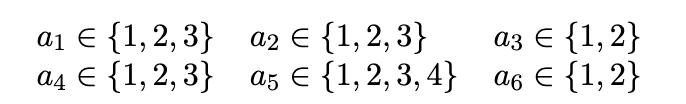
3. 2 classes for each datasets problem:
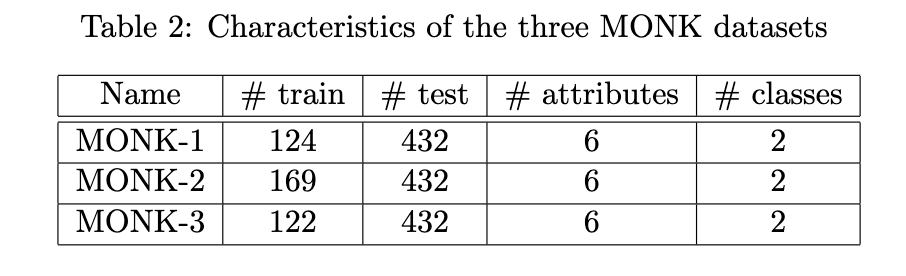

- True rules behind the datasets:
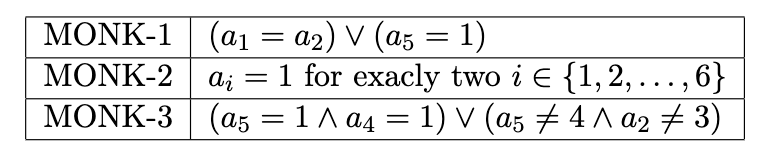

## Assignment_0: 
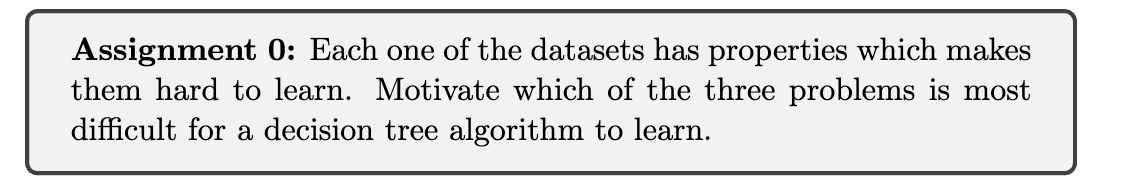

The MONK-3 dataset is the most difficult for a decision tree to learn, due to a combination of its logical structure and inherent noise:

1. More complex concepts structure:



It requires more complex and deeper tress with more branches, which means that the algorithm must split the data multiple times to set these distinct decision boundaries

2. Presence of Noise

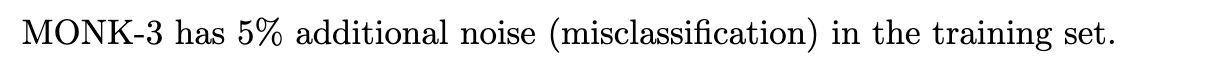

More noise increases the difficulty for a decision tree algorithm, as it may fit to incorrect patterns of the data, which would reduce the performance of predicting the test data.

3. Non-linear splits

the combination of a5 = 1 and a4 = 1, or a5 != 4 and a2 != 3 is more complicated

# 2. Entropy calculation

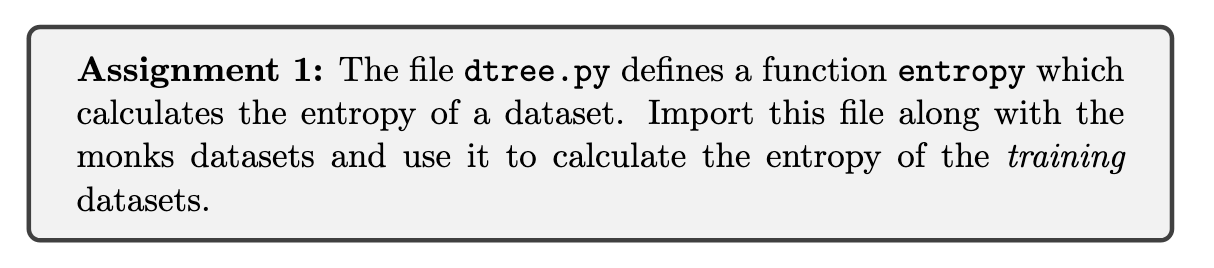

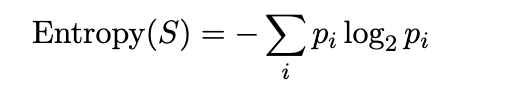

In [85]:
entropy1 = dtree.entropy(m.monk1)
entropy2 = dtree.entropy(m.monk2)
entropy3 = dtree.entropy(m.monk3)

print('Entropy of monk1_training: ', entropy1)
print('Entropy of monk2_training: ', entropy2)
print('Entropy of monk3_training: ', entropy3)

Entropy of monk1_training:  1.0
Entropy of monk2_training:  0.957117428264771
Entropy of monk3_training:  0.9998061328047111


the entropy calculation is based purely on the class distribution in the datasets and independent of the attributes and rules

## Assignment_2:
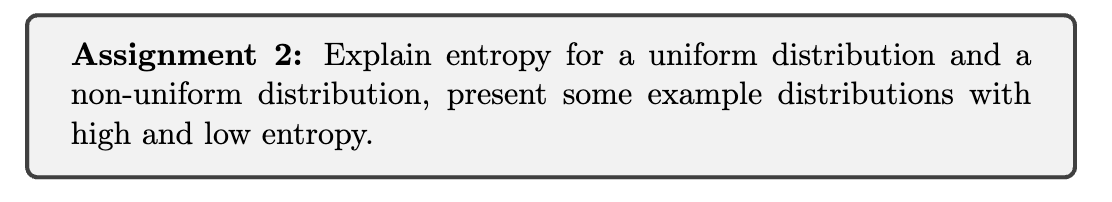

- Uniform distribution

A uniform distribution means all possible outcomes have an equal probability. 



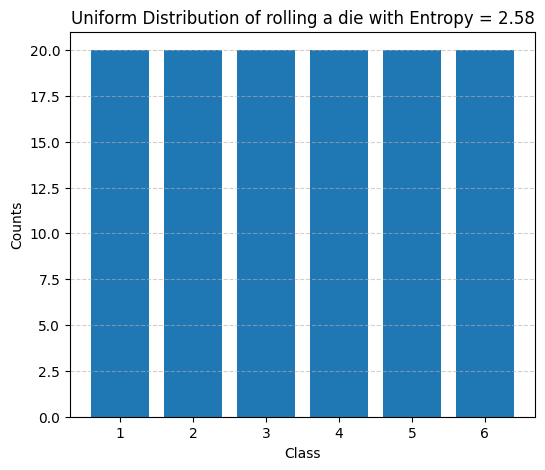

In [98]:
classes = ['1', '2', '3', '4', '5', '6']
counts = [20, 20, 20, 20, 20, 20]
total = sum(counts)
probabilities = [count / total for count in counts]
entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)

plt.figure(figsize=(6, 5))
plt.bar(classes, counts)
plt.title(f"Uniform Distribution of rolling a die with Entropy = {entropy:.2f}")
plt.ylabel("Counts")
plt.xlabel("Class")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


- Non-uniform distribution

A non-uniform distribution means the probabilities of outcomes are uneven. 


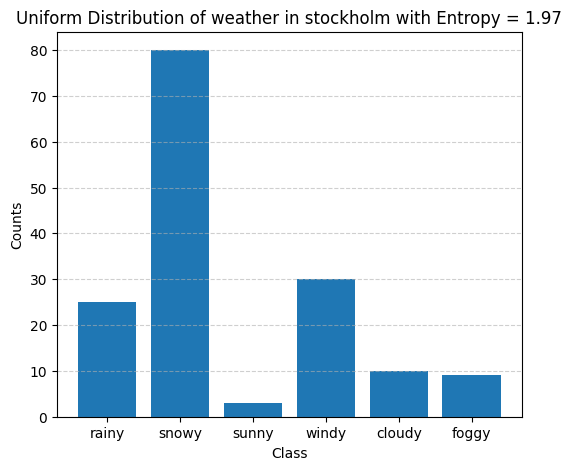

In [101]:
classes = ['rainy', 'snowy','sunny','windy','cloudy','foggy']
counts = [25, 80, 3,30,10,9]
total = sum(counts)
probabilities = [count / total for count in counts]
entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)

plt.figure(figsize=(6, 5))
plt.bar(classes, counts)
plt.title(f"Uniform Distribution of weather in stockholm with Entropy = {entropy:.2f}")
plt.ylabel("Counts")
plt.xlabel("Class")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 3. Information gain

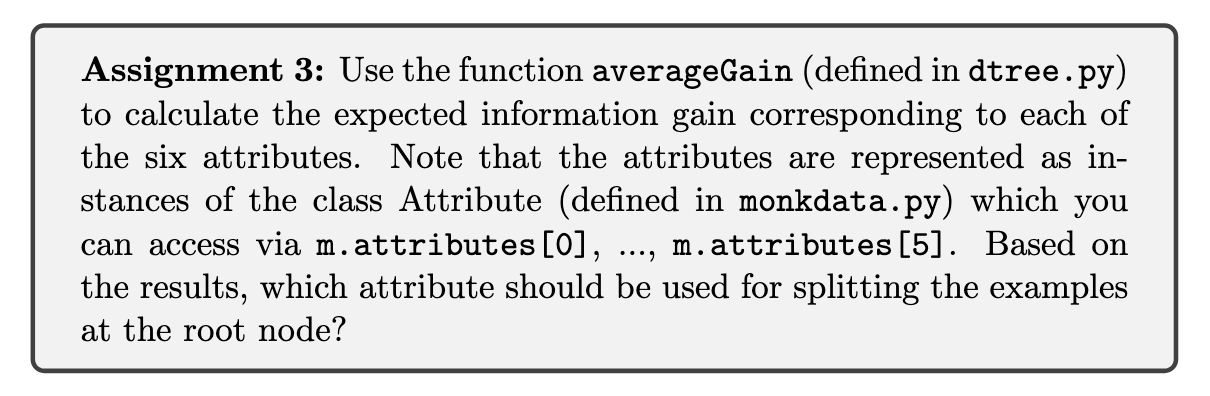

In [88]:
import dtree

# List of MONK datasets
datasets = [m.monk1, m.monk2, m.monk3]

# Loop through MONK datasets
for dataset_index, dataset in enumerate(datasets, start=1):
    print(f"\nInformation Gain for MONK{dataset_index}:")
    gains = []
    # Loop through attributes
    for attribute_index in range(6):

        gain = dtree.averageGain(dataset, m.attributes[attribute_index])
        gains.append((gain, f"a{attribute_index+1}"))
        print(f"  a{attribute_index + 1}: {gain}")
    
    best_gain, best_attribute = max(gains)
    if best_gain > 0:
              print(f"  Best gain is for {best_attribute} with a value of {best_gain}")
    else:
              print("  No gain achieved")



Information Gain for MONK1:
  a1: 0.07527255560831925
  a2: 0.005838429962909286
  a3: 0.00470756661729721
  a4: 0.02631169650768228
  a5: 0.28703074971578435
  a6: 0.0007578557158638421
  Best gain is for a5 with a value of 0.28703074971578435

Information Gain for MONK2:
  a1: 0.0037561773775118823
  a2: 0.0024584986660830532
  a3: 0.0010561477158920196
  a4: 0.015664247292643818
  a5: 0.01727717693791797
  a6: 0.006247622236881467
  Best gain is for a5 with a value of 0.01727717693791797

Information Gain for MONK3:
  a1: 0.007120868396071844
  a2: 0.29373617350838865
  a3: 0.0008311140445336207
  a4: 0.002891817288654397
  a5: 0.25591172461972755
  a6: 0.007077026074097326
  Best gain is for a2 with a value of 0.29373617350838865


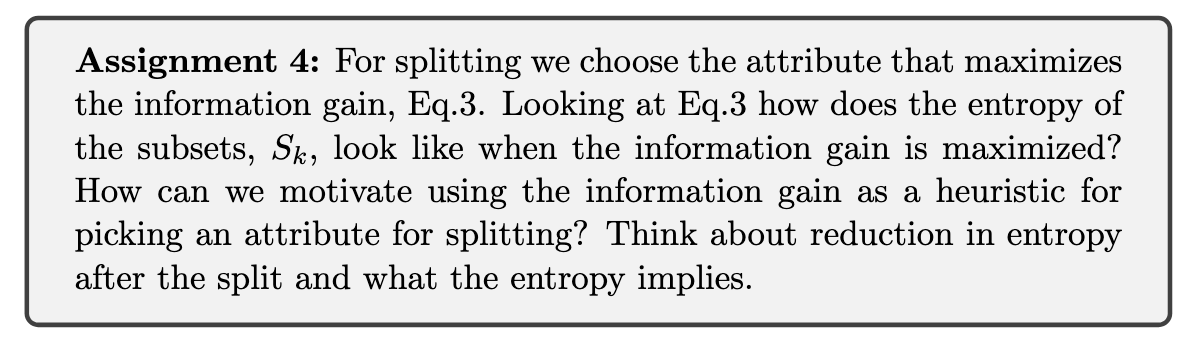

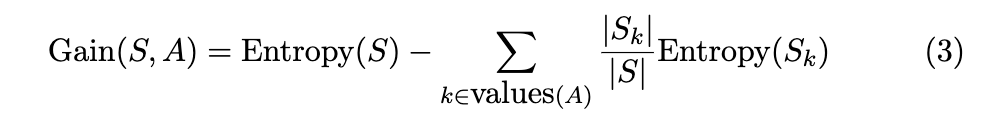

- How to maximize the information gain?

When information gain is maximized, the subsets Sk​ should be as pure as possible. This means that the uncertainty(entropy) of each subset SkSk​ is low or even zero (if all examples in Sk​ belong to the same class).

- How to split the data?

To reduce the entropy after splitting, and increase the efficiency and more information from it

# 5. Build decision trees

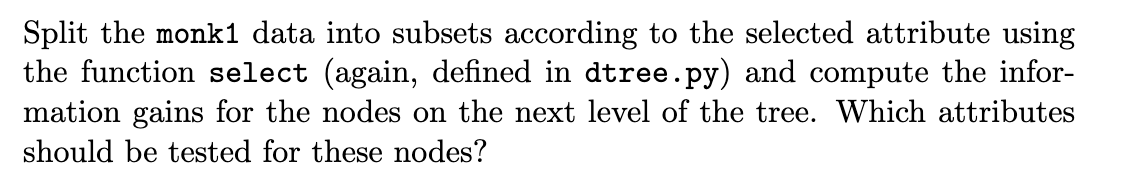

since a5 has the most information gain, choose a5 as the first split node, which has 4 values (1,2,3,4) and can be divided into 4 subsets

In [90]:
subsets_1a5 = [dtree.select(m.monk1, m.attributes[4], value) for value in range(1, 5)]
for subset_index, subset in enumerate(subsets_1a5, start=1):
        print(f"\nSubset {subset_index} from a5:")
        gains = []
        for i in range(0,6):  # Loop through all attributes
            if i == 4:  # Skip the already used attribute (e.g., a3)
                continue
            gain = dtree.averageGain(subset, m.attributes[i])
            gains.append((gain, f"a{i+1}"))
            print(f"  Information Gain of a{i+1} is : {gain}")
        
        best_gain, best_attribute = max(gains)
        if best_gain > 0:
                  print(f"  Best gain is for {best_attribute} with a value of {best_gain}")
        else:
                  print("  No gain achieved")




Subset 1 from a5:
  Information Gain of a1 is : 0.0
  Information Gain of a2 is : 0.0
  Information Gain of a3 is : 0.0
  Information Gain of a4 is : 0.0
  Information Gain of a6 is : 0.0
  No gain achieved

Subset 2 from a5:
  Information Gain of a1 is : 0.040216841609413634
  Information Gain of a2 is : 0.015063475072186083
  Information Gain of a3 is : 0.03727262736015946
  Information Gain of a4 is : 0.04889220262952931
  Information Gain of a6 is : 0.025807284723902146
  Best gain is for a4 with a value of 0.04889220262952931

Subset 3 from a5:
  Information Gain of a1 is : 0.03305510013455182
  Information Gain of a2 is : 0.002197183539100922
  Information Gain of a3 is : 0.017982293842278896
  Information Gain of a4 is : 0.01912275517747053
  Information Gain of a6 is : 0.04510853782483648
  Best gain is for a6 with a value of 0.04510853782483648

Subset 4 from a5:
  Information Gain of a1 is : 0.20629074641530198
  Information Gain of a2 is : 0.033898395077640586
  Information

1. subset1(a5=1): all the information gain for all attributes are 0, so it is pure or cannot be split further. 
2. subset2(a5=1): select the a4 which has the highest gain and split this subset further
3. subset3(a5=3): select the a6 which has the highest gain and split this subset further
4. subset4(a5=4): select the a1 which has the highest gain and split this subset further

## 5.2.
For the monk1 data draw the decision tree up to the first two levels and
assign the majority class of the subsets that resulted from the two splits
to the leaf nodes.

In [92]:
for subset_index, subset in enumerate(subsets_1a5, start=1):
          print(f"\nSubset {subset_index} from a5:")
          gains = []
      
          # Calculate information gain for all attributes except the already used a5
          for i in range(0, 6):  # Loop through all attributes
              if i == 4:  # Skip the already used attribute (a5)
                  continue
              gain = dtree.averageGain(subset, m.attributes[i])
              gains.append((gain, i))  # Store gain and attribute index
              print(f"  Information Gain of a{i+1} is : {gain}")
      
          # Find the best attribute and its gain
          best_gain, best_attribute = max(gains, key=lambda x: x[0])
          majority_class = dtree.mostCommon(subset)  # Find majority class for the subset
      
          if best_gain > 0:  # If a good split is possible
              print(f"  Best gain is for a{best_attribute+1} with a value of {best_gain}")
              
              # Split this subset further using the best attribute
              subsets_2 = [
                  dtree.select(subset, m.attributes[best_attribute], value) 
                  for value in range(1, len(m.attributes[best_attribute].values) + 1)
              ]
      
              # Process each subset of the second level
              for sub_index, sub_subset in enumerate(subsets_2, start=1):
                  # Skip empty subsets
                  if len(sub_subset) == 0:
                      print(f"    Subset {sub_index} is empty. Skipping...")
                      continue
                
                  print(f"\n  Subset {sub_index} from a{best_attribute+1}:")
                  gains_2 = []
      
                  # Calculate information gain for all attributes except a5 and the current best attribute
                  for i in range(0, 6):
                      if i == 4 or i == best_attribute:  # Skip already used attributes
                          continue
                      gain_2 = dtree.averageGain(sub_subset, m.attributes[i])
                      gains_2.append((gain_2, i))  # Store gain and attribute index
                      print(f"    Information Gain of a{i+1} is : {gain_2}")
                  
                  # Find the best attribute for the second split
                  if gains_2:  # Check if gains_2 has valid entries
                      best_gain_2, best_attribute_2 = max(gains_2, key=lambda x: x[0])
                      if best_gain_2 > 0:
                          majority_class = dtree.mostCommon(sub_subset)
                          print(f"    Best gain is for a{best_attribute_2+1} with a value of {best_gain_2}")
                          print(f"    Majority class for Subset {sub_index} from a{best_attribute+1}: {majority_class}")
                      else:
                          print("    No gain achieved")
                          majority_class = dtree.mostCommon(sub_subset)
                          print(f"    Majority class for Subset {sub_index} from a{best_attribute+1}: {majority_class}")
                  else:
                      print("    No attributes left for splitting")
                      majority_class = dtree.mostCommon(sub_subset)
                      print(f"    Majority class for Subset {sub_index} from a{best_attribute+1}: {majority_class}")
          else:
              print("  No gain achieved")
              print(f"  Majority class for Subset {subset_index}: {majority_class}")
      


Subset 1 from a5:
  Information Gain of a1 is : 0.0
  Information Gain of a2 is : 0.0
  Information Gain of a3 is : 0.0
  Information Gain of a4 is : 0.0
  Information Gain of a6 is : 0.0
  No gain achieved
  Majority class for Subset 1: True

Subset 2 from a5:
  Information Gain of a1 is : 0.040216841609413634
  Information Gain of a2 is : 0.015063475072186083
  Information Gain of a3 is : 0.03727262736015946
  Information Gain of a4 is : 0.04889220262952931
  Information Gain of a6 is : 0.025807284723902146
  Best gain is for a4 with a value of 0.04889220262952931

  Subset 1 from a4:
    Information Gain of a1 is : 0.060879074523283117
    Information Gain of a2 is : 0.016313165825732057
    Information Gain of a3 is : 0.05180039542238557
    Information Gain of a6 is : 0.05180039542238557
    Best gain is for a1 with a value of 0.060879074523283117
    Majority class for Subset 1 from a4: False

  Subset 2 from a4:
    Information Gain of a1 is : 0.19811742113040337
    Informatio

In [93]:
# Build tree up to depth 2
tree_depth_2 = dtree.buildTree(m.monk1, m.attributes, maxdepth=2)

# Draw the limited-depth tree
drawTree(tree_depth_2)

SystemExit: 0

/Users/xueyao.wang/anaconda3/envs/bioinfo/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


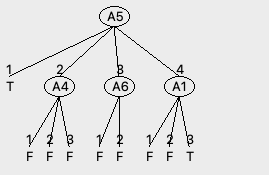

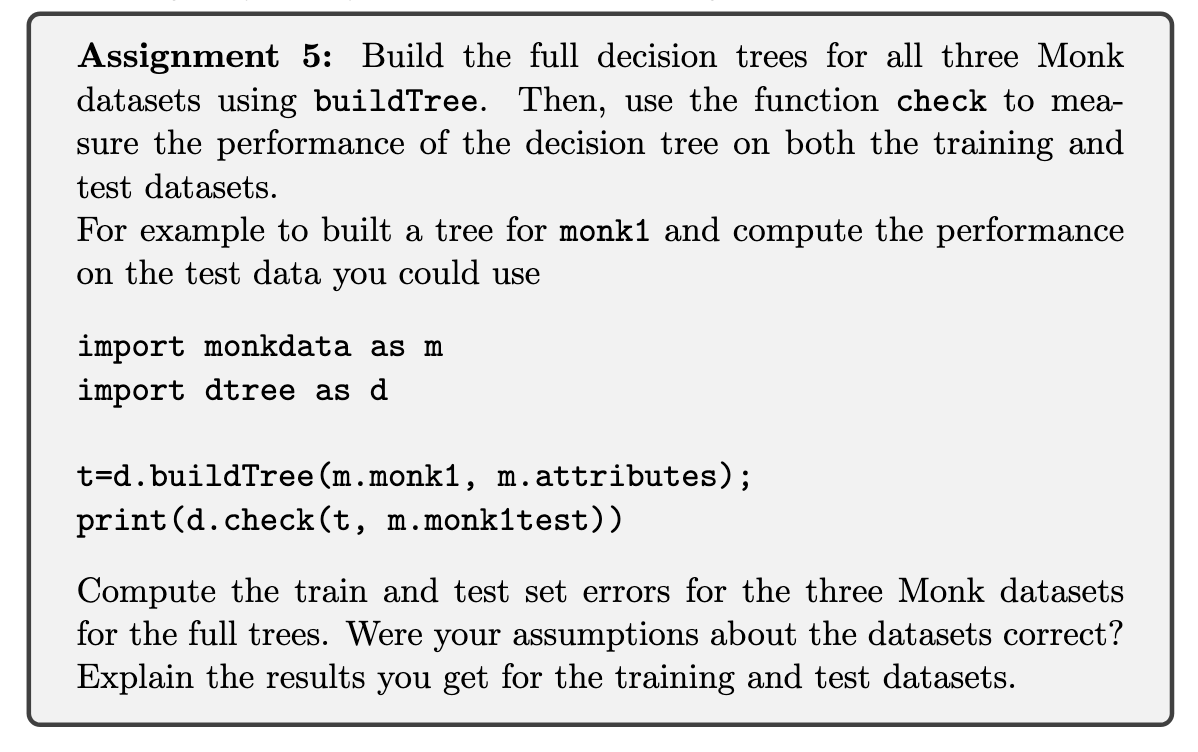

In [3]:
tree_1 = dtree.buildTree(m.monk1, m.attributes)
tree_2 = dtree.buildTree(m.monk2, m.attributes)
tree_3 = dtree.buildTree(m.monk3, m.attributes)

In [4]:
print(f"the error of tree_1 training is {1-dtree.check(tree_1,m.monk1)}")

print(f"the error of tree_1 testing is {1-dtree.check(tree_1,m.monk1test)}\n")

print(f"the error of tree_2 training is {1-dtree.check(tree_2,m.monk2)}")
print(f"the error of tree_2 testing is {1-dtree.check(tree_2,m.monk2test)}\n")

print(f"the error of tree_3 training is {1-dtree.check(tree_3,m.monk3)}")
print(f"the error of tree_3 testing is {1-dtree.check(tree_3,m.monk3test)}")

the error of tree_1 training is 0.0
the error of tree_1 testing is 0.17129629629629628

the error of tree_2 training is 0.0
the error of tree_2 testing is 0.30787037037037035

the error of tree_3 training is 0.0
the error of tree_3 testing is 0.05555555555555558


- Training dataset performance

all three datasets have the 100% training accuracy, which is expected because the tree is built using the entire training dataset and perfectly fits the training data

- Test dataset performance

1. MONK1
the performance is moderately well.

2. Monk2 
the performance is under performance

3. MONK3
the performance is better than i expected since it has more noise and it is the best out of 3.

- Reasons
1. the MONK2 has the most complex decision tree structure
the tree tries to split on one attribute, but no single specific attribute can represent 'the exactly 2 attributes =1' rule. So the tree ends up creating many small branches to try to approximate the pattern, which leads to overfitting

2. MONK3 has a simpler logical rule even though it has 5% random noise

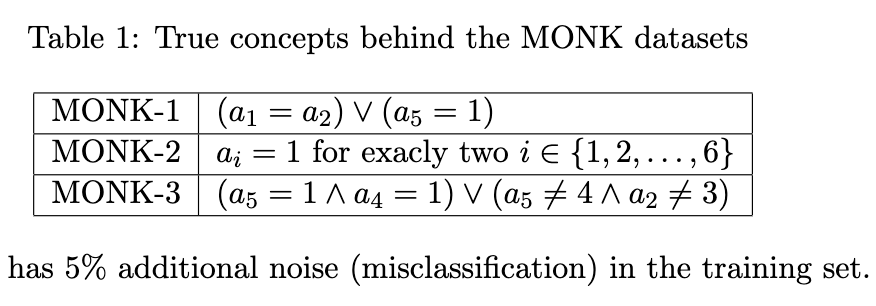

- the reason that MONK3 performs better than MONK1:
1. `MONK-1 rule` looks simpler, but it has higher degree of freedom: it checks:
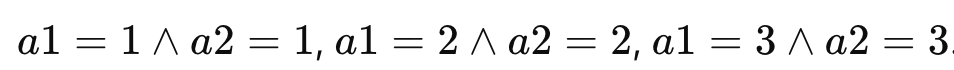
which leads to multiple cases to evaluate and add the complexity to the model
2. `5% noise` can help monk-3 model to reduce overfitting which force the model to focus on the dominant patterns rather than trying to memorize the irrelevant details in the data

# Pruning

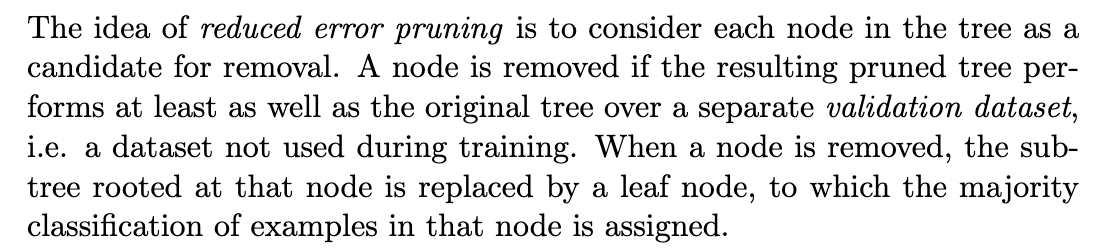

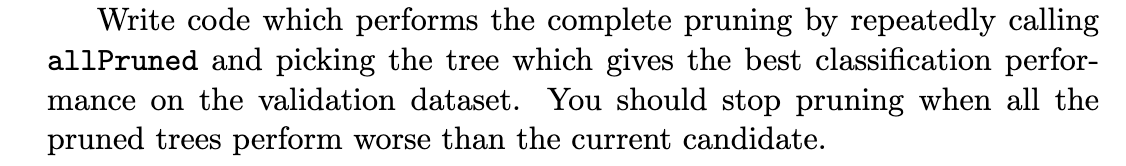

In [112]:
import random
def partition(data, fraction):
      ldata = list(data)
      random.shuffle(ldata)
      breakPoint = int(len(ldata) * fraction)
      return ldata[:breakPoint], ldata[breakPoint:]
monk1train, monk1val = partition(m.monk1, 0.6)
monk2train, monk2val = partition(m.monk2, 0.6)
monk3train, monk3val = partition(m.monk3, 0.6)

In [121]:
def prune_tree(train, val):
    tree = dtree.buildTree(train, m.attributes)
    pruned_tree = tree
    best_performance = dtree.check(pruned_tree, val)
    improved = True

    while improved:
        improved = False
        pruned_trees = dtree.allPruned(pruned_tree)
        for pruned_candidate in pruned_trees:
            performance = dtree.check(pruned_candidate, val)
            if performance >= best_performance:
                pruned_tree = pruned_candidate
                best_performance = performance
                improved = True
    return pruned_tree,best_performance

In [113]:
def pruning(tree, validation):
    best_performance = dtree.check(tree, validation)  # Validate initial tree
    improved = True

    # Perform pruning until no improvement
    while improved:
        improved = False
        pruned_trees = dtree.allPruned(tree)  # Get all possible pruned trees

        for pruned_tree in pruned_trees:
            # Validate the pruned tree
            performance = dtree.check(pruned_tree, validation)
            if performance >= best_performance:
                # Update the best tree and performance
                tree = pruned_tree
                best_performance = performance
                improved = True
      
    print(f"Best validation performance after pruning: {best_performance}")
    return tree, best_performance

In [ ]:
error_unpruned_1 = 1-dtree.check(tree_1_train, m.monk1test)
error_unpruned_2 = 1-dtree.check(tree_2_train, m.monk2test)
error_unpruned_3 = 1-dtree.check(tree_3_train, m.monk3test)

In [131]:
#tree_1_train = dtree.buildTree(monk1train, m.attributes)
prun_tree_1, val_performance_1 = prune_tree(monk1train, monk1val)
print(f"Best validation performance after pruning: {1-dtree.check(prun_tree_1, m.monk1test)}")

#tree_2_train = dtree.buildTree(monk2train, m.attributes)
prun_tree_2, val_performance_2 = prune_tree(monk2train, monk2val)
print(f"Best validation performance after pruning: {1-dtree.check(prun_tree_2, m.monk2test)}")

#tree_3_train = dtree.buildTree(monk3train, m.attributes)
prun_tree_3, val_performance_3 = prune_tree(monk3train, monk3val)
print(f"Best validation performance after pruning: {1-dtree.check(prun_tree_3, m.monk3test)}")

Best validation performance after pruning: 0.27083333333333337
Best validation performance after pruning: 0.3287037037037037
Best validation performance after pruning: 0.0


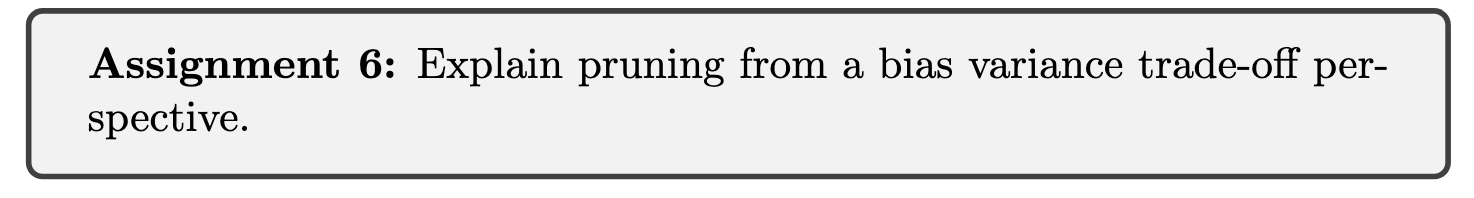

- when it is full tree before pruning

the tree model has high variance(more parameters) and low bias(perfectly fit the training data, capturing all patterns, including noise)

- after pruning

by removing some branches, the tree model has more bias(no longer perfectly fit the training data), and reduce the variance(simplify the model)

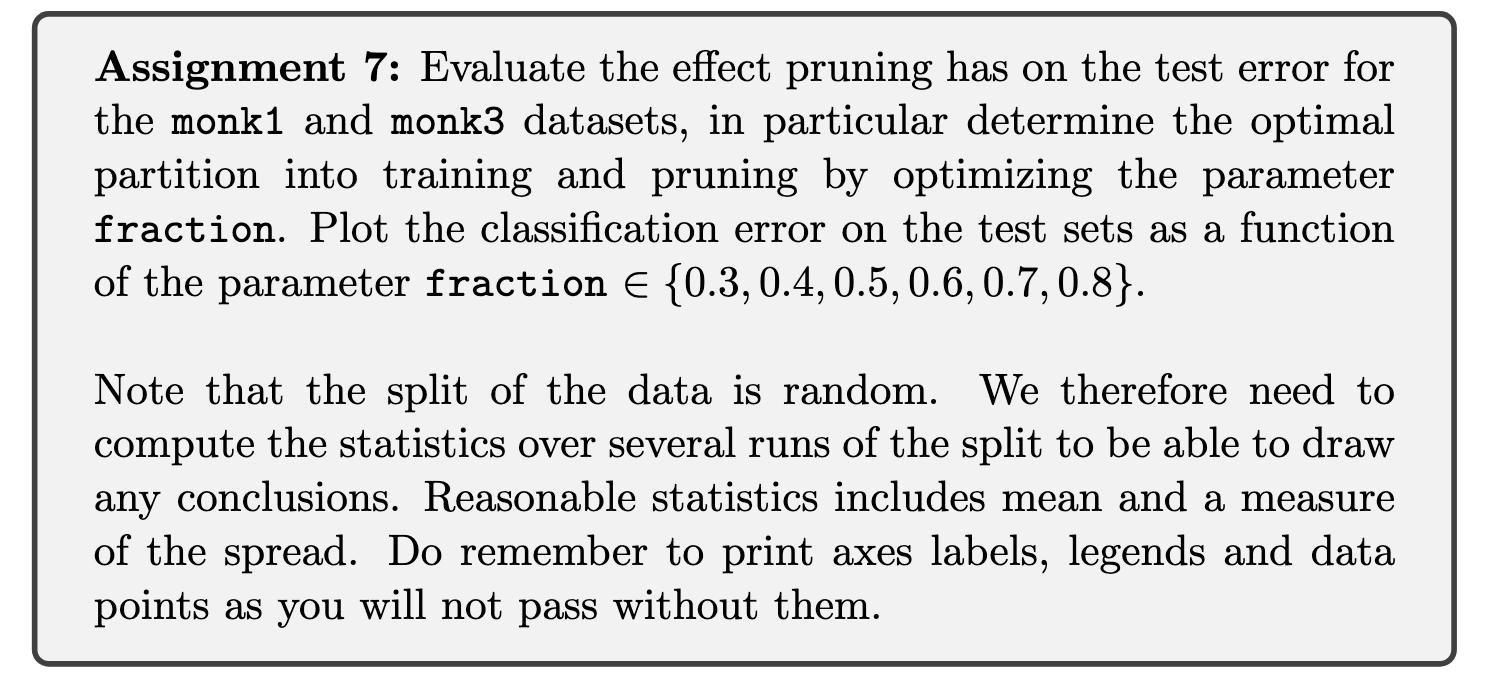

In [ ]:
error_unpruned_1 = 1-dtree.check(tree_1_train, m.monk1test)
error_unpruned_2 = 1-dtree.check(tree_2_train, m.monk2test)
error_unpruned_3 = 1-dtree.check(tree_3_train, m.monk3test)

In [133]:
def evaluate_monk(monk_dataset, monk_test):
    test_means = []
    test_stds = []

    for fraction in fractions:
        errors = []  # Collect test error for this fraction
        for _ in range(runs):
            # Partition dataset
            train, val = partition(monk_dataset, fraction)
            pruned_tree,performance = prune_tree(train, val)

            # Evaluate pruned tree on the test set
            test_error = 1-dtree.check(pruned_tree, monk_test)
            errors.append(test_error)

        # Compute mean and standard deviation for this fraction
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        test_means.append(mean_error)
        test_stds.append(std_error)

    return test_means, test_stds


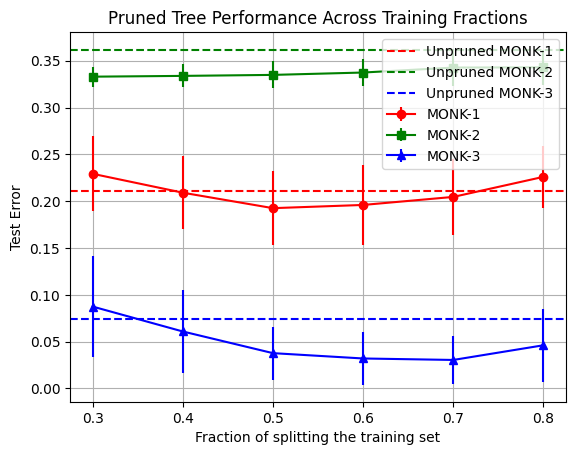

In [134]:
# Define the fractions for training-validation split
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
runs = 100
# Evaluate MONK-1, MONK-2, and MONK-3
monk1_means, monk1_stds = evaluate_monk(m.monk1, m.monk1test)
monk2_means, monk2_stds = evaluate_monk(m.monk2, m.monk2test)
monk3_means, monk3_stds = evaluate_monk(m.monk3, m.monk3test)

# Plot the results
plt.errorbar(fractions, monk1_means, color='r',yerr=monk1_stds, fmt='o-', label='MONK-1')
plt.errorbar(fractions, monk2_means, color='g',yerr=monk2_stds, fmt='s-', label='MONK-2')
plt.errorbar(fractions, monk3_means, color='b',yerr=monk3_stds, fmt='^-', label='MONK-3')

# Add horizontal lines for unpruned tree errors
plt.axhline(y=error_unpruned_1, color='r', linestyle='--', label='Unpruned MONK-1')
plt.axhline(y=error_unpruned_2, color='g', linestyle='--', label='Unpruned MONK-2')
plt.axhline(y=error_unpruned_3, color='b', linestyle='--', label='Unpruned MONK-3')
plt.xlabel("Fraction of splitting the training set")
plt.ylabel("Test Error") 
plt.title("Pruned Tree Performance Across Training Fractions")
plt.legend()
plt.grid(True)
plt.show()